In [2]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_6 = pd.read_csv('data/exp_6/EDA.csv' , header= None)
fl_eda_6.columns  = ['eda']
fl_eda_freq_6 = fl_eda_6.iloc[1].values
print(len(fl_eda_6))
print('freq: ', fl_eda_freq_6)
fl_eda_6.head(10)

4574
freq:  [4.]


,eda
0,1.527729e+09
1,4.000000e+00
2,0.000000e+00
3,4.420060e-01
4,5.111900e-01
5,5.175950e-01
6,5.188770e-01
7,5.214390e-01
8,5.214390e-01
9,5.227200e-01


In [4]:
fl_init_time_6 = datetime.datetime.utcfromtimestamp(fl_eda_6.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_6

'2018-05-31 01:13:19'

In [5]:
fl_eda_6 = fl_eda_6.iloc[3:]

In [6]:
#create index 
fl_time_eda_6 = pd.date_range(start=fl_init_time_6, periods=len(fl_eda_6), 
                              freq=str(1/int(fl_eda_freq_6))+'S')
fl_time_eda_6

DatetimeIndex([       '2018-05-31 01:13:19', '2018-05-31 01:13:19.250000',
               '2018-05-31 01:13:19.500000', '2018-05-31 01:13:19.750000',
                      '2018-05-31 01:13:20', '2018-05-31 01:13:20.250000',
               '2018-05-31 01:13:20.500000', '2018-05-31 01:13:20.750000',
                      '2018-05-31 01:13:21', '2018-05-31 01:13:21.250000',
               ...
               '2018-05-31 01:32:19.250000', '2018-05-31 01:32:19.500000',
               '2018-05-31 01:32:19.750000',        '2018-05-31 01:32:20',
               '2018-05-31 01:32:20.250000', '2018-05-31 01:32:20.500000',
               '2018-05-31 01:32:20.750000',        '2018-05-31 01:32:21',
               '2018-05-31 01:32:21.250000', '2018-05-31 01:32:21.500000'],
              dtype='datetime64[ns]', length=4571, freq='250L')

In [7]:
fl_eda_6 = fl_eda_6.set_index(fl_time_eda_6, drop =True)
fl_eda_6 = fl_eda_6[:]
fl_eda_6 = fl_eda_6.dropna()
print(len(fl_eda_6))
fl_eda_6.head()

4571


,eda
2018-05-31 01:13:19.000,0.442006
2018-05-31 01:13:19.250,0.511190
2018-05-31 01:13:19.500,0.517595
2018-05-31 01:13:19.750,0.518877
2018-05-31 01:13:20.000,0.521439


# Tags

In [8]:
tags_6 = pd.read_csv('data/exp_6/tags.csv' , header= None)
tags_6.columns  =  ['tagged_time']
tags_6.head()

,tagged_time
0,1.527729e+09
1,1.527730e+09
2,1.527730e+09
3,1.527730e+09
4,1.527730e+09


In [9]:
tags_6.tagged_time = [datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.000') for x in tags_6.tagged_time]

In [10]:
fl_day6_bath = fl_eda_6.loc[tags_6.tagged_time[1]:tags_6.tagged_time[2]]

In [11]:
fl_day6_bbath = fl_eda_6.loc[:tags_6.tagged_time[1]]

In [12]:
tags_6.tagged_time[0]

'2018-05-31 01:17:03.000'

## Remove Outliers

In [16]:
fl_exp6 = fl_eda_6.copy()#example dataset of normally distributed data. 
fl_exp6['present'] = 1
fl_exp6= fl_exp6[np.abs(fl_exp6.eda-fl_exp6.eda.mean())<=(3*fl_exp6.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp6= fl_exp6[~(np.abs(fl_exp6.eda-fl_exp6.eda.mean())>(3*fl_exp6.eda.std()))] #or if you prefer the other way around

print(len(fl_exp6))
fl_exp6.head()

4557


,eda,present
2018-05-31 01:13:19.000,0.442006,1
2018-05-31 01:13:19.250,0.511190,1
2018-05-31 01:13:19.500,0.517595,1
2018-05-31 01:13:19.750,0.518877,1
2018-05-31 01:13:20.000,0.521439,1


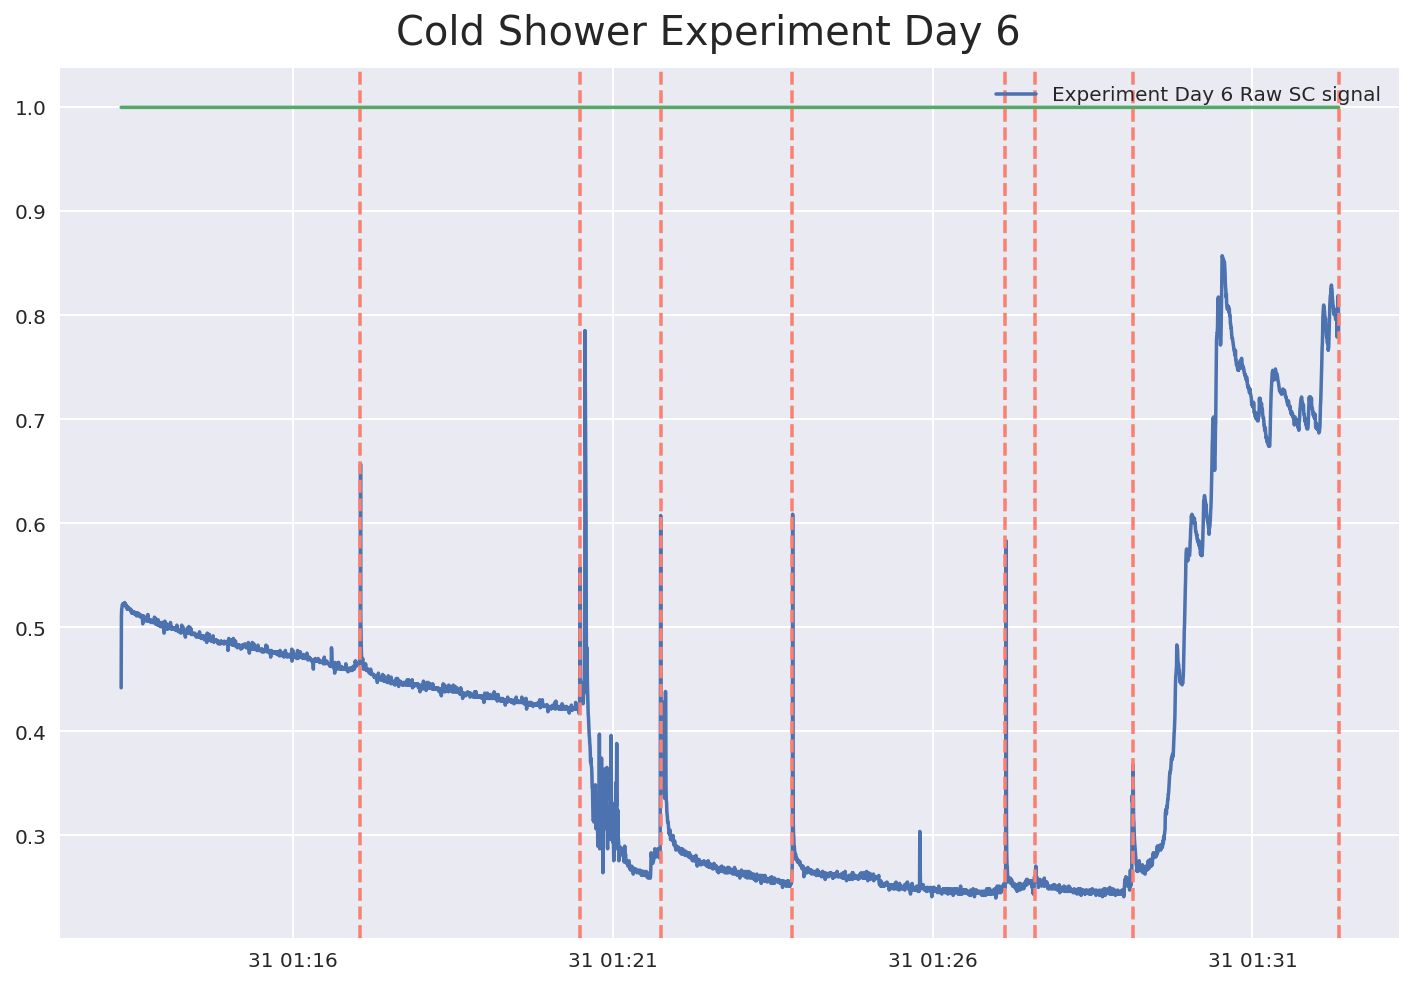

In [17]:
# y_mean = np.mean(fl_exp2.eda)
plt.figure(figsize=(12,8))
plt.plot(fl_exp6)
plt.legend(['Experiment Day 6 Raw SC signal'],loc=1,fontsize='medium')
plt.axvline(x = tags_6.tagged_time[0],color = 'salmon',linestyle='--')
plt.axvline(x = tags_6.tagged_time[1],color = 'salmon',linestyle='--')
plt.axvline(x = tags_6.tagged_time[2],color = 'salmon',linestyle='--')
plt.axvline(x = tags_6.tagged_time[3],color = 'salmon',linestyle='--')
plt.axvline(x = tags_6.tagged_time[4],color = 'salmon',linestyle='--')
plt.axvline(x = tags_6.tagged_time[5],color = 'salmon',linestyle='--')
plt.axvline(x = tags_6.tagged_time[6],color = 'salmon',linestyle='--')
plt.axvline(x = tags_6.tagged_time[7],color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
plt.figtext(.5,.9,'Cold Shower Experiment Day 6', fontsize=20, ha='center')
plt.show()